# K-NEAREST NEIGHBORS

SUPERVISED LEARNING - CLASSIFICATION - KNN

KNN - simplest supervised ML algorithms mostly used for classification
- stores all available cases and classifies new cases baes on a similarity measure
- k is parametar that refers to the number of the nearest neighbors to include in the majority voting process
- data point is classified by majority votes from its 5 nearest neighbors

How choose k?

- process called PARAMET TUNING - it is important for better accuracy!!
- k to low or too big - not good


- sqrt(n) - where n is the total nuber of data points
- odd value of K is selected to avoid confusion between two classes of data

When use KNN?
1. Data is labeled
2. Data is noise free
3. Data set is small

How does KNN work?

We have data about height and weight and decide is it underweight or overweight

dist(d)=sqrt((x-a)^2+(y-b)^2) - distance between two points

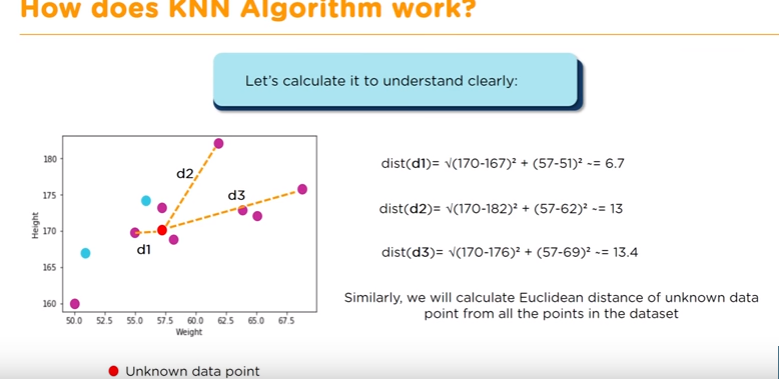

In [2]:
from IPython.display import Image
Image(filename='Pictures/M72.PNG', width=600, height=600)

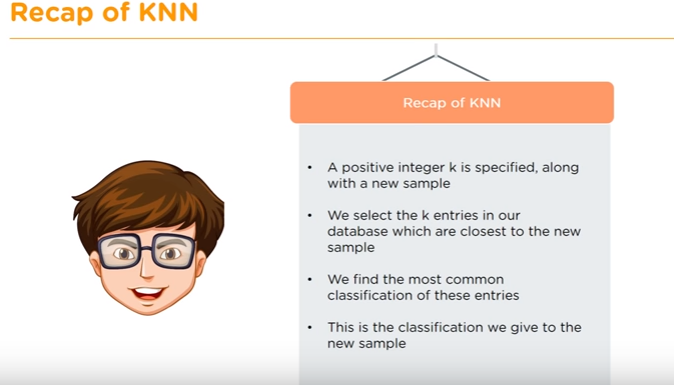

In [3]:
Image(filename='Pictures/M73.PNG', width=600, height=600)

EXAMPLE:

KNN predict does person have diabetes?

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score


In [10]:
diabetes=pd.read_csv('Data/diabetes.csv')

In [11]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
len(diabetes)

768

Values of columns where cannot be zero!!!
Glucose, BloodPressure, Skin Thickness, BMI, INsulin

In [13]:
zero_not_accepted=['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']

In [14]:
for column in zero_not_accepted:
    diabetes[column] = diabetes[column].replace(0, np.NaN)# replace 0 with NaN
    mean = int(diabetes[column].mean(skipna=True)) #mean of dataset
    diabetes[column] = diabetes[column].replace(np.NaN,mean) # replace all NaN with mean

In [15]:
diabetes['Insulin']

0      155.0
1      155.0
2      155.0
3       94.0
4      168.0
5      155.0
6       88.0
7      155.0
8      543.0
9      155.0
10     155.0
11     155.0
12     155.0
13     846.0
14     175.0
15     155.0
16     230.0
17     155.0
18      83.0
19      96.0
20     235.0
21     155.0
22     155.0
23     155.0
24     146.0
25     115.0
26     155.0
27     140.0
28     110.0
29     155.0
       ...  
738    160.0
739    155.0
740    150.0
741     94.0
742    116.0
743    155.0
744    140.0
745    105.0
746    155.0
747     57.0
748    200.0
749    155.0
750    155.0
751     74.0
752    155.0
753    510.0
754    155.0
755    110.0
756    155.0
757    155.0
758    155.0
759    155.0
760     16.0
761    155.0
762    155.0
763    180.0
764    155.0
765    112.0
766    155.0
767    155.0
Name: Insulin, Length: 768, dtype: float64

Split dataset:

1. x-> from first to 8. column
2. y-> last column - 9. column

In [20]:
#split dataset

x=diabetes.iloc[:,0:8] #last column not included
y=diabetes.iloc[:, 8]

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=0)

In [22]:
#feature scaling - any algorithm that computes distance or assumes normality, scale features!!

In [24]:
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.transform(x_test)

In [27]:
len(y)

768

In [29]:
import math
math.sqrt(len(y_test))

12.409673645990857

WE DON'T WANNA HAVE EVEN NUMBER FOR NUMBER OF NEIGHBORS!!!

1. So we choose first odd number below 12 -> 11!!

In [30]:
#define model and train data
classifier=KNeighborsClassifier(n_neighbors=11, p=2, metric='euclidean')
# P=2 - 2 OUTCOMES  - diabetic or not

In [31]:
#fit model
classifier.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=11, p=2,
           weights='uniform')

In [33]:
#predicting
y_pred=classifier.predict(x_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [34]:
#evaluate model

cm=confusion_matrix(y_test,y_pred)
cm

array([[94, 13],
       [15, 32]], dtype=int64)

In [35]:
acc= (94+32)/(94+32+13+15)
acc

0.8181818181818182

In [37]:
f1_score(y_test,y_pred) #takes in both sides of false positives

0.6956521739130436

In [38]:
#ok model!